## - 불러올 패키지 목록

In [26]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [5]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_csv( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\auto-mpg.csv',
                  header = None )

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## 히스토그램

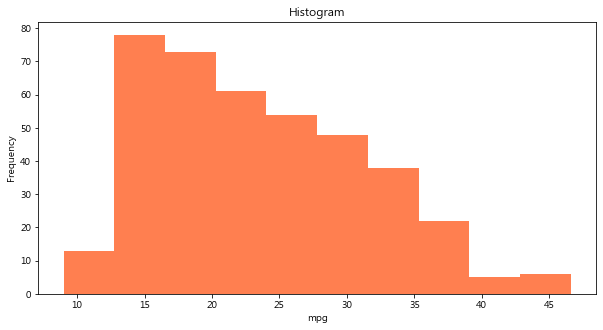

In [13]:
# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot( kind='hist',
                color='coral', figsize=(10, 5) )

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

## 산점도

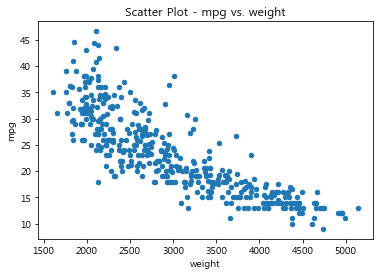

In [20]:
# 연비(mpg) 열에 대한 히스토그램 그리기
df.plot( x = 'weight', y = 'mpg',
         kind='scatter' )

plt.style.use('default')   # 스타일 서식 지정

# 그래프 꾸미기
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

##  버블 차트

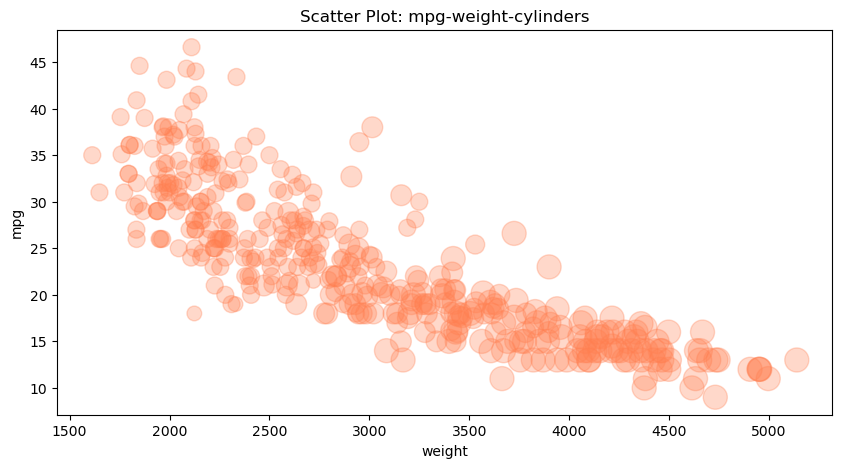

In [22]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 (버블차트)
df.plot( x='weight', y='mpg',
         kind='scatter',
         c='coral', figsize=(10, 5),
         s = cylinders_size,  # 버블 차트 옵션
         alpha=0.3 )

plt.title('Scatter Plot: mpg-weight-cylinders')

plt.show()

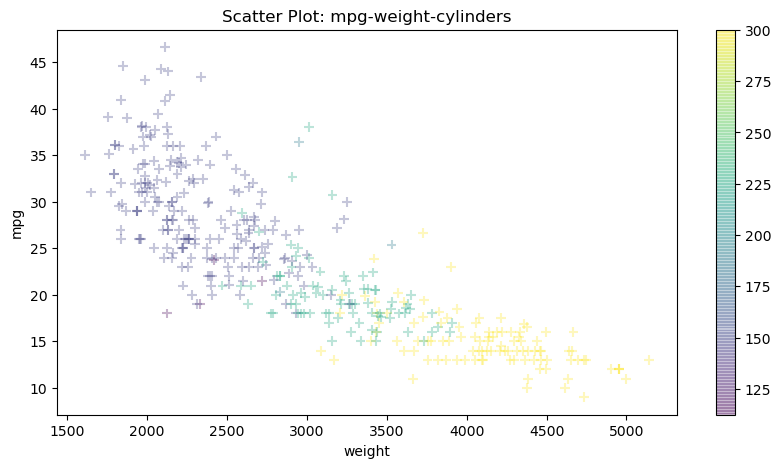

In [23]:
# 3개의 변수로 산점도 그리기 
df.plot( x='weight', y='mpg', kind='scatter',
         marker='+', figsize=(10, 5),
         cmap='viridis',
         c=cylinders_size,
         s=50,
         alpha=0.3)

plt.title('Scatter Plot: mpg-weight-cylinders')

# 그래프를 그림파일로 저장
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

## 파이 차트

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


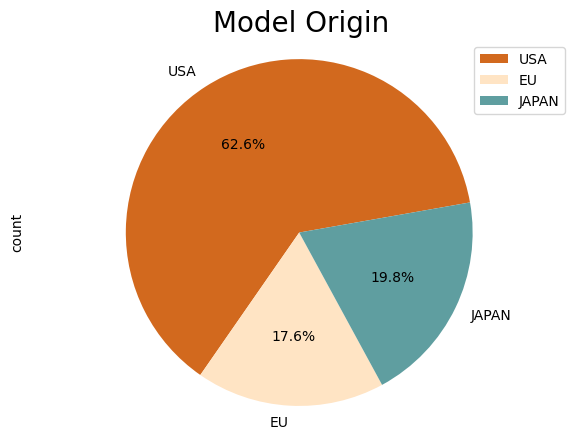

In [24]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

## 박스 플롯

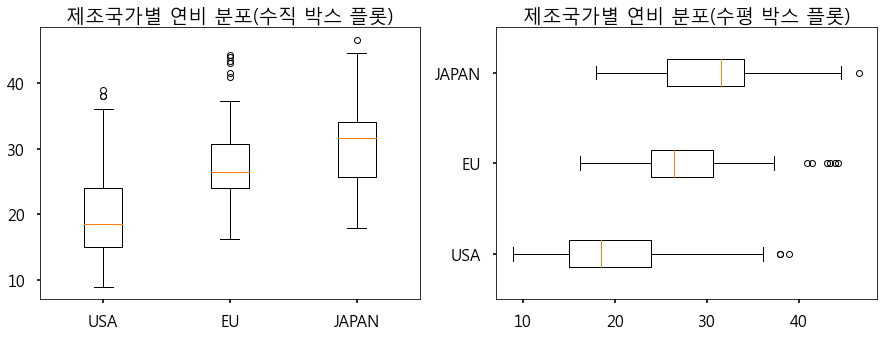

In [28]:
plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()